In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importando a base de dados

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.rename(columns={"age": "idade",
                   "sex": "sexo",
                   "bmi": "IMC",
                   "children": "qt_filhos",
                   "smoker": "fumante",
                   "region": "regiao",
                   "expenses": "gastos"}, inplace=True)
df.head()

,idade,sexo,IMC,qt_filhos,fumante,regiao,gastos
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      1338 non-null   int64  
 1   sexo       1338 non-null   object 
 2   IMC        1338 non-null   float64
 3   qt_filhos  1338 non-null   int64  
 4   fumante    1338 non-null   object 
 5   regiao     1338 non-null   object 
 6   gastos     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Temos 1338 entradas e todas as colunas possuem 1338 valores não nulos, o que significa que não há dados nulos no conjunto de dados. 

In [5]:
df.describe()

,idade,IMC,qt_filhos,gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.describe(include=object)

,sexo,fumante,regiao
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
# Fazer a troca do valor das variáveis.
# Temos features categóricas? se sim, quais?

## Construindo as visualizações

### Histograma

<AxesSubplot:title={'center':'Histograma dos gastos'}, xlabel='gastos', ylabel='Frequência'>

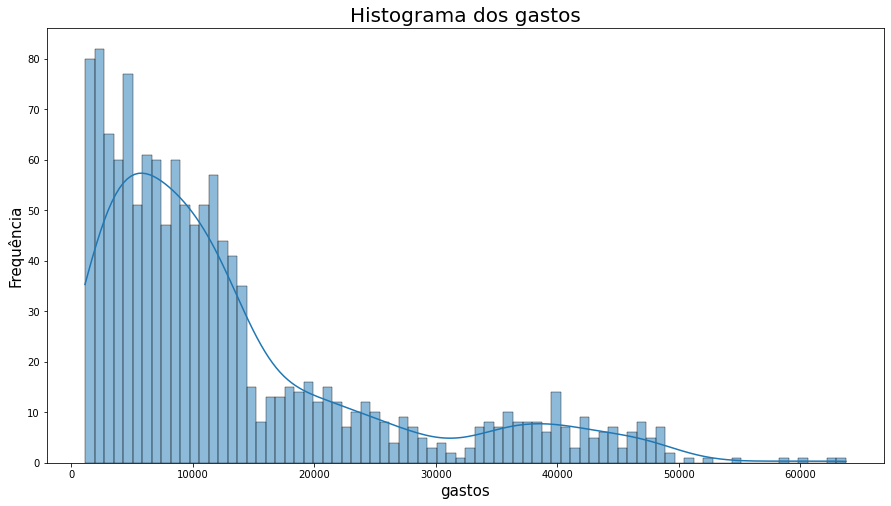

In [8]:
ax = sns.histplot(data=df, x='gastos', bins=80, kde=True)
ax.figure.set_size_inches((15,8))
ax.set_title("Histograma dos gastos", fontsize=20)
ax.set_xlabel("gastos", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax

![](https://camo.githubusercontent.com/85886e3e09ffa319ea68523b89b1b1a6729f826df6864a5a12a1f1c0edee45c3/68747470733a2f2f692e696d6775722e636f6d2f414464434557782e706e67)

Logo a distribuição da variável target é assimétrica à direita.

**Explicar o que é assimétrica a direita, o isso impacta no conjunto de dados, se temos que consertar isso**

### BoxPlot

In [9]:
# Quais são as variáveis numéricas?

df.select_dtypes(include=['int64', 'float64']).columns

Index(['idade', 'IMC', 'qt_filhos', 'gastos'], dtype='object')

![](https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg)

Text(0, 0.5, 'Valor')

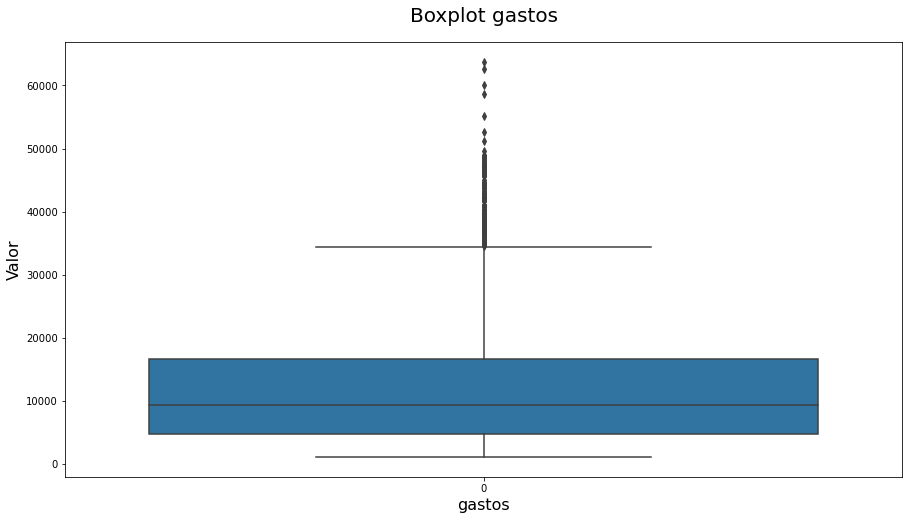

In [10]:
ax = sns.boxplot(data=df['gastos'])
ax.figure.set_size_inches((15,8))
ax.set_title('Boxplot gastos', fontsize=20, pad=20)
ax.set_xlabel("gastos", fontsize=16)
ax.set_ylabel("Valor", fontsize=16)

Percebe-se que a variável target possui alguns possíveis canditados a outliers. **Atenção a isso!**

Vamos analisar a variável target em relação a algumas features e analisar o comportamento.

**1. Idade**

In [12]:
len(df.idade.unique())

47

Text(0, 0.5, 'Gastos')

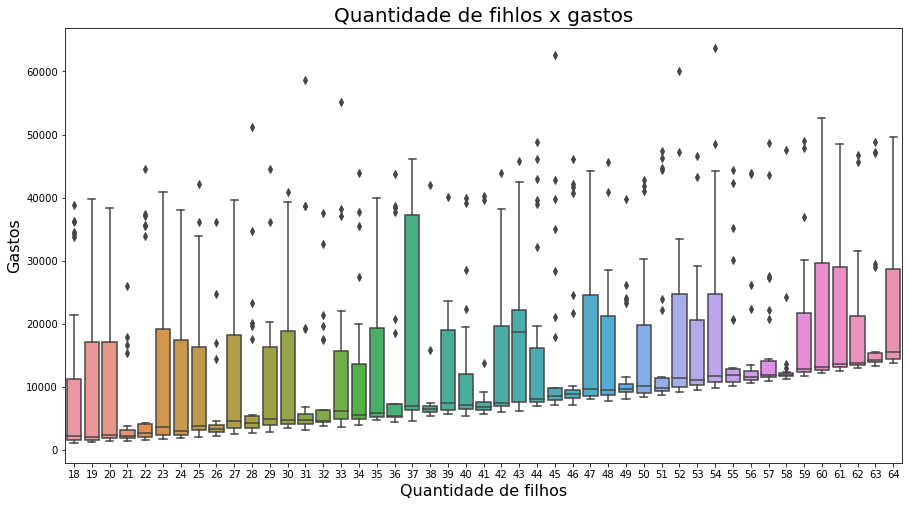

In [11]:
ax = sns.boxplot(x="idade", y="gastos", data=df)
ax.figure.set_size_inches(15,8)
ax.set_title("Quantidade de fihlos x gastos", fontsize=20)
ax.set_xlabel("Quantidade de filhos", fontsize=16)
ax.set_ylabel("Gastos", fontsize=16)


Construir um boxplot pela idade ficaria extremamente poluido, pois há 47 idades diferentes no conjunto de dados.

**2. IMC**

In [14]:
len(df.IMC.unique())

275

Mesma situação citada acima.

**3. qt_filhos**

In [15]:
len(df.qt_filhos.unique())

6

Text(0, 0.5, 'Gastos')

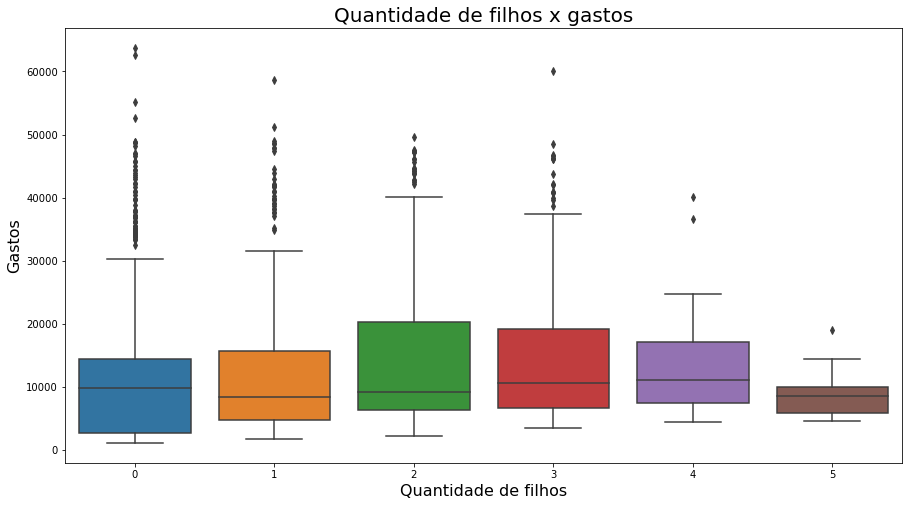

In [12]:
ax = sns.boxplot(x="qt_filhos", y="gastos", data=df)
ax.figure.set_size_inches(15,8)
ax.set_title("Quantidade de filhos x gastos", fontsize=20)
ax.set_xlabel("Quantidade de filhos", fontsize=16)
ax.set_ylabel("Gastos", fontsize=16)


### Countplot

In [17]:
# Quais são as variáveis categóricas?

df.select_dtypes(include=['object']).columns

Index(['sexo', 'fumante', 'regiao'], dtype='object')

In [18]:
def plot_categorical_variable(variable, df):
    ax = sns.countplot(x=variable, data=df)
    ax.figure.set_size_inches(15,8)
    ax.set_title(f"Quantidade de {variable}", fontsize=20)
    ax.set_xlabel(f"{variable}", fontsize=16)
    ax.set_ylabel("Quantidade", fontsize=16)
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=12, padding=2, color='black')

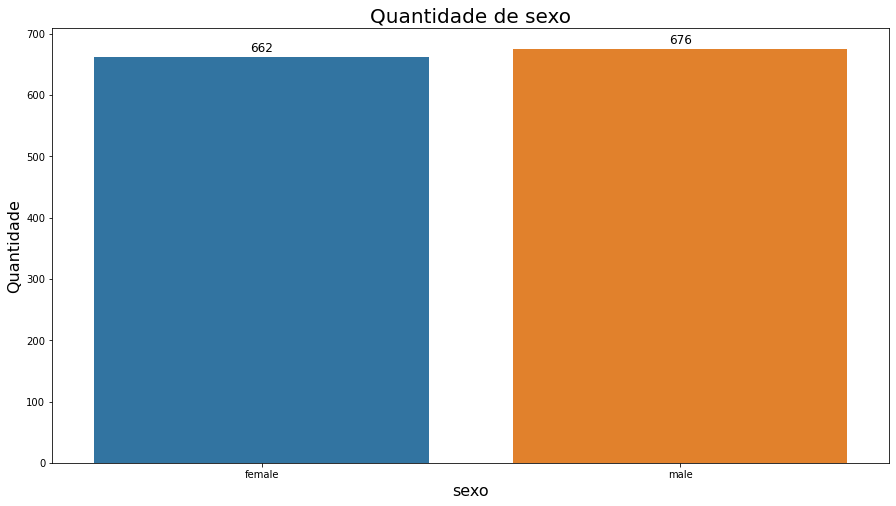

In [19]:
plot_categorical_variable("sexo", df)

Logo o conjunto de dados está balanceado de acordo com o sexo.

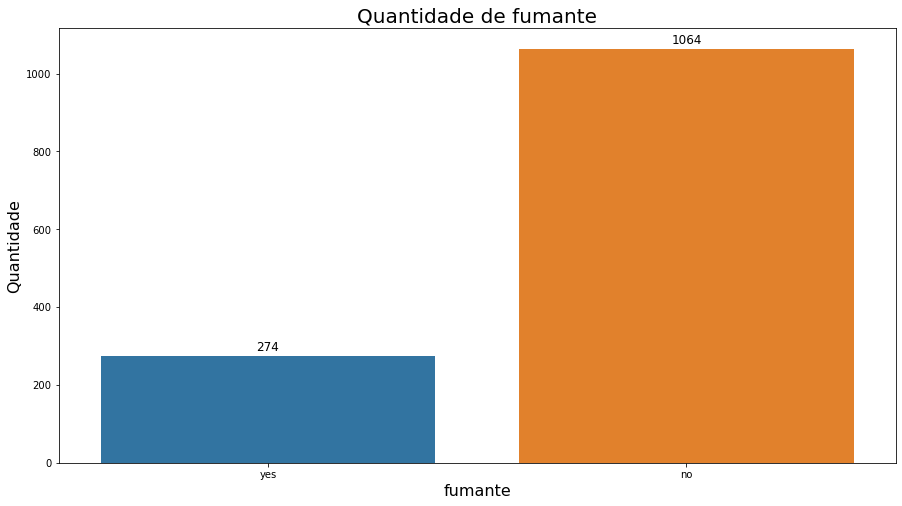

In [20]:
plot_categorical_variable("fumante", df)

Já em relação aos fumantes, o conjunto de dados possui em maior quantidade quem não fuma.

Será se quem é fumante gasta mais que quem não fuma?

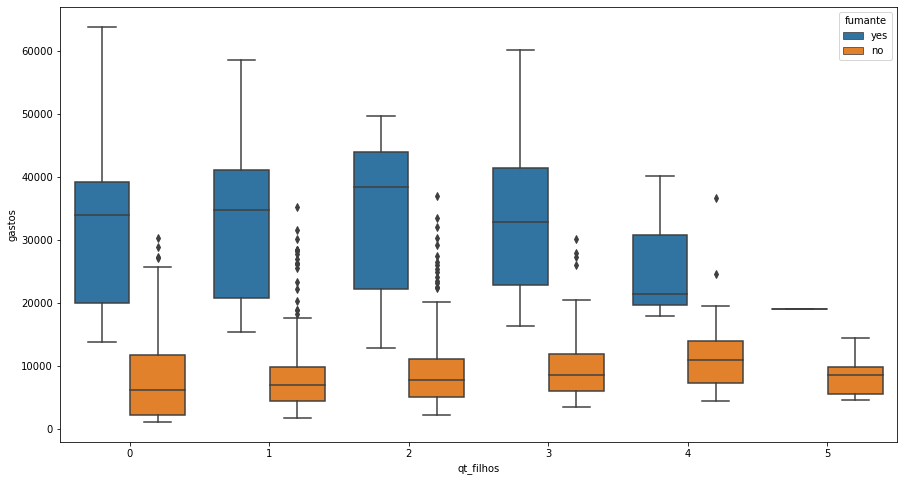

In [21]:
ax = sns.boxplot(x="qt_filhos", y="gastos", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)

Será que homens fumam mais que mulheres?

In [14]:
str(115/(547+115)*100) + '%'

'17.371601208459214%'

In [15]:
str(159/(517+159)*100) + '%'

'23.5207100591716%'

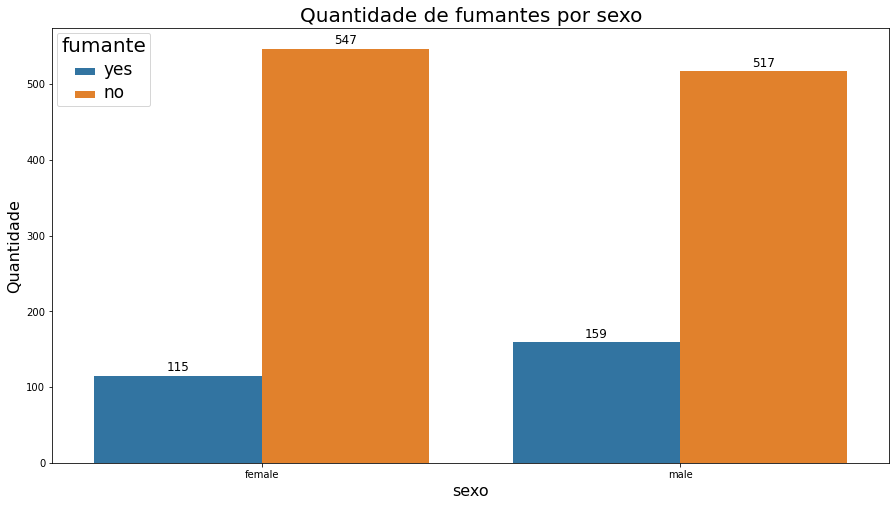

In [22]:
ax = sns.countplot(x="sexo", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)
ax.set_title(f"Quantidade de fumantes por sexo", fontsize=20)
ax.set_xlabel(f"sexo", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='17') # Para o texto da legenda
plt.setp(ax.get_legend().get_title(), fontsize='20') # Para o título da legenda

for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=2, color='black')    

De acordo com o conjunto de dados a quantidade de fumantes por sexo está bem equiparada.

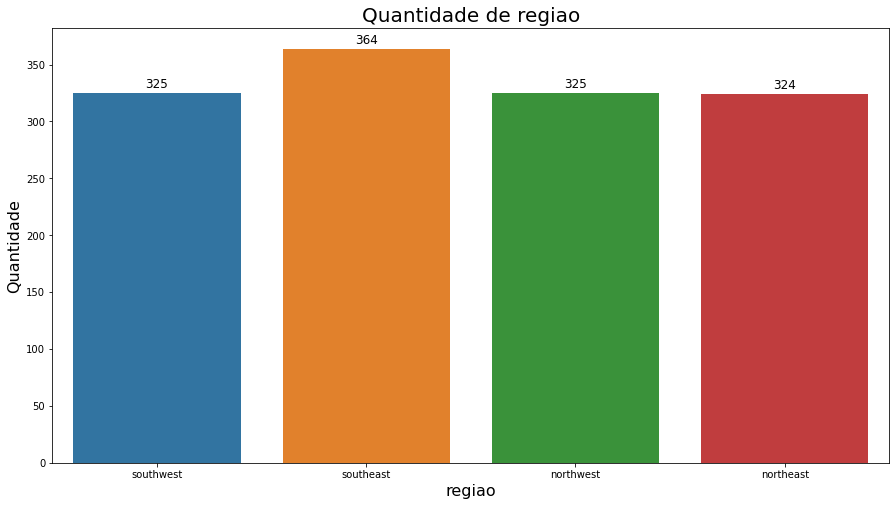

In [23]:
plot_categorical_variable("regiao", df)

Temos alguma região que os gastos de fumantes são maiores que os gastos de não fumantes?

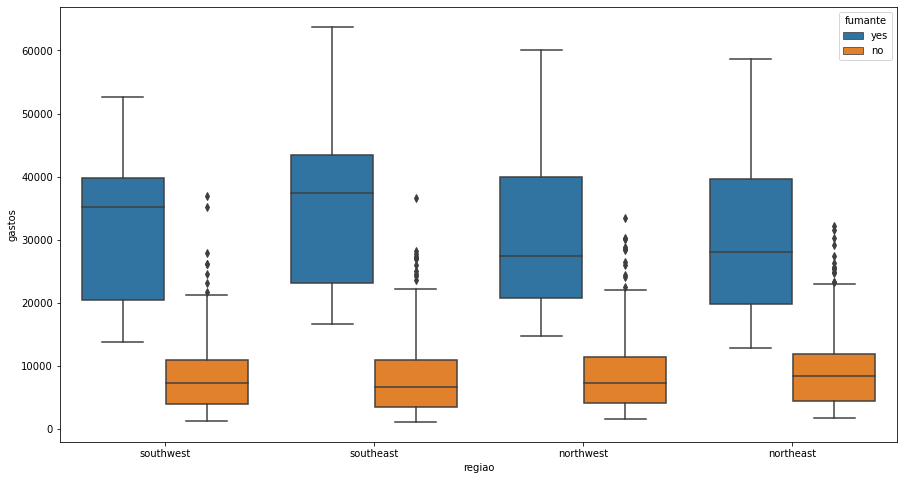

In [24]:
ax = sns.boxplot(x="regiao", y="gastos", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)

## Analisando a correlação

-> Explicar por que é tão importante analisarmos a correlação e em que deixar duas variáveis correlacionadas impactam no modelo.

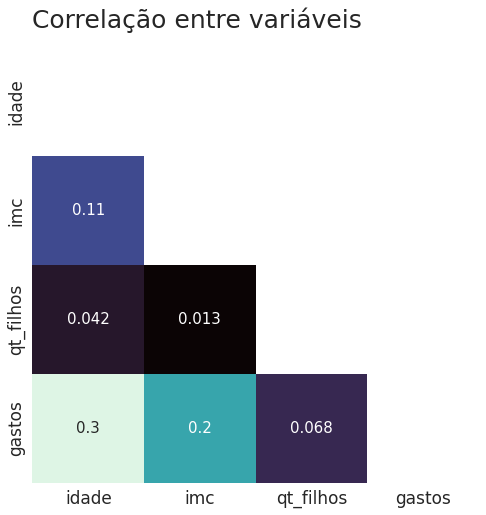

In [94]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr, mask=mask, fmt=".2",  annot=True, cbar=False, 
                     cmap='mako', annot_kws={"fontsize":15})
    ax.tick_params(labelsize=17)
    ax.set_title('Correlação entre variáveis', fontsize=25, loc='left', pad=20)

# Transformar a variável target para a escala logarítmica

# Pairplot

# Dummização